In [1]:
import arviz as az
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

import pymc as pm
print(pm.__version__)

5.15.1


In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

# Introduction

https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#pymc-overview

Model 

$$
Y \sim N(\mu, \sigma^2) \\
\mu = \alpha + \beta_1X_1 + \beta_2X_2 \\
\alpha \sim N(0, 100) \\
\beta_i \sim N(0, 100) \\
\sigma \sim \|N(0,1)\|
$$

Data simulation

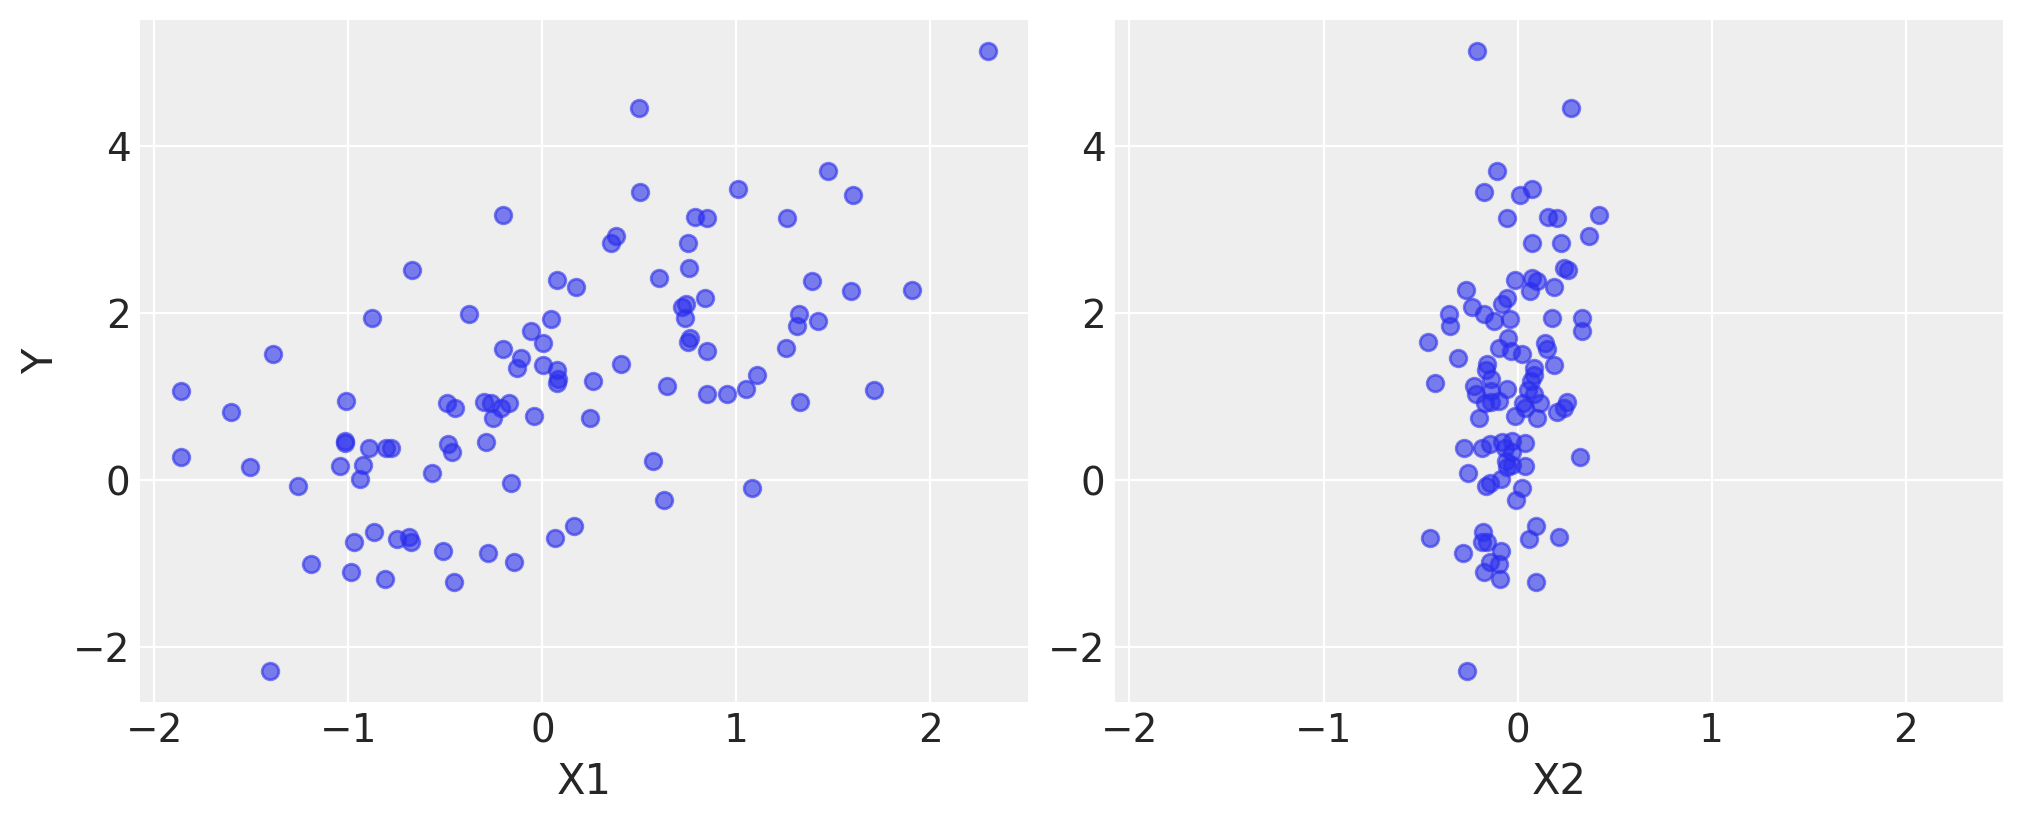

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");


modeling with PYMC

In [4]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    # Common used distribution in addition to normmal includes Beta, Exponential, Categorical, Gamma, Binomial
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)


In [5]:
# sample posterior
# with basic_model:
#     # instantiate sampler
#     step = pm.Slice()

#     # draw 5000 posterior samples
#     slice_idata = pm.sample(5000, step=step)

In [6]:
# pm.model_to_graphviz(basic_model)


# Linear Regression

$$
Y = X\beta + \epsilon \\
Y \sim N(X\beta, \sigma^2)
$$


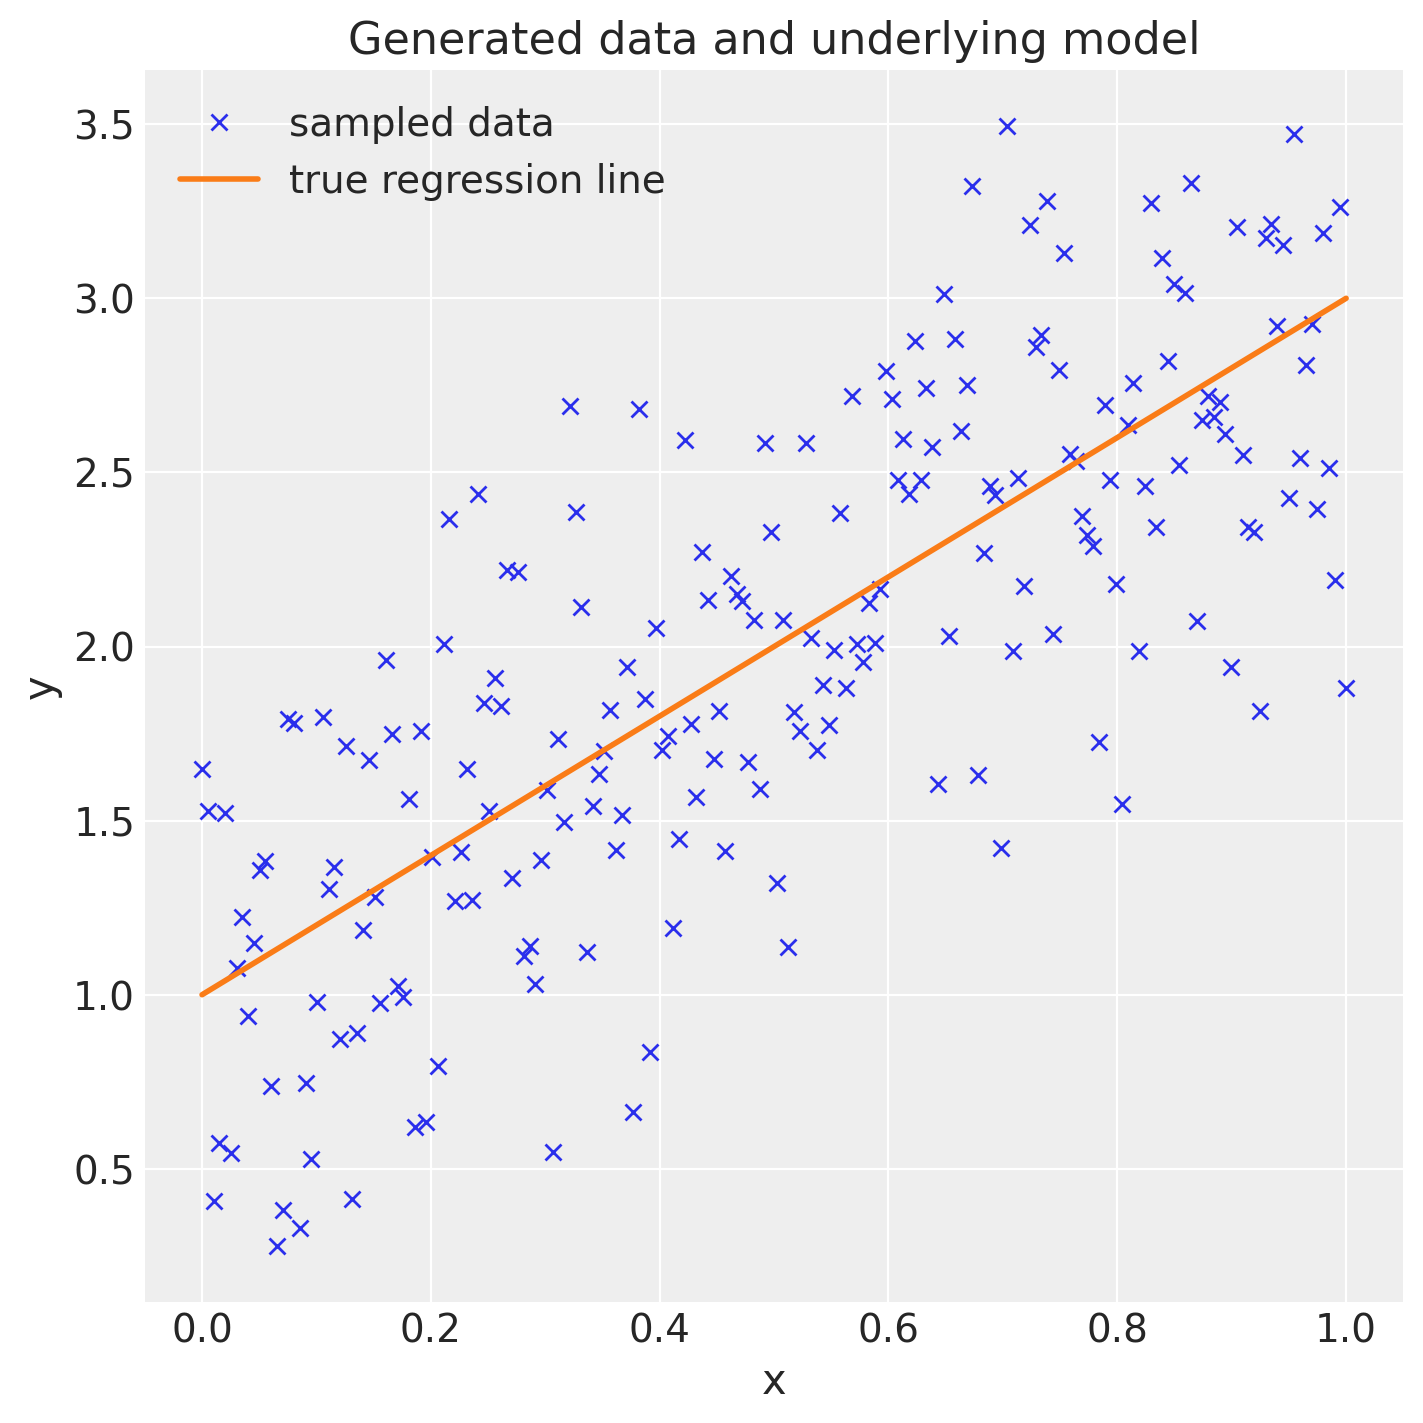

In [8]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [10]:
with pm.Model() as model:
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    slope = pm.Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
#     idata = pm.sample(3000)
    